In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [34]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/Rosdiana13/DM-Week8-Rosdiana/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome"})
df = df.rename(columns={"Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
# Check for null values in the dataset
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

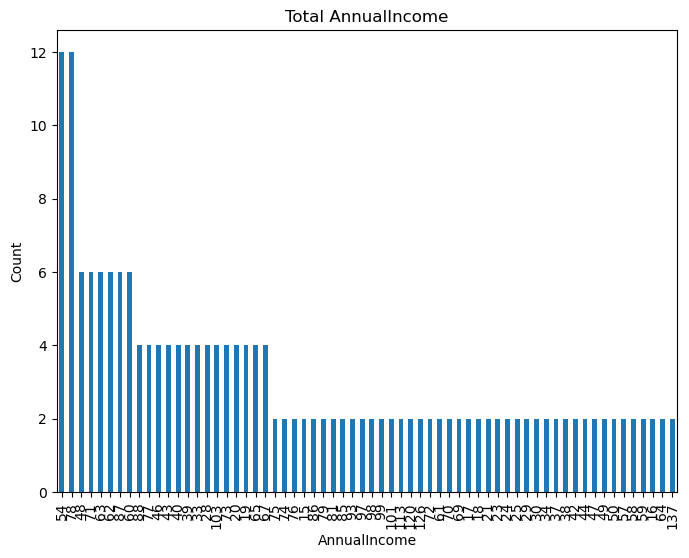

In [38]:
# make an insightful visualization and explain
species_counts = df['AnnualIncome'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar')
plt.title('Total AnnualIncome')
plt.xlabel('AnnualIncome')
plt.ylabel('Count')
plt.show()

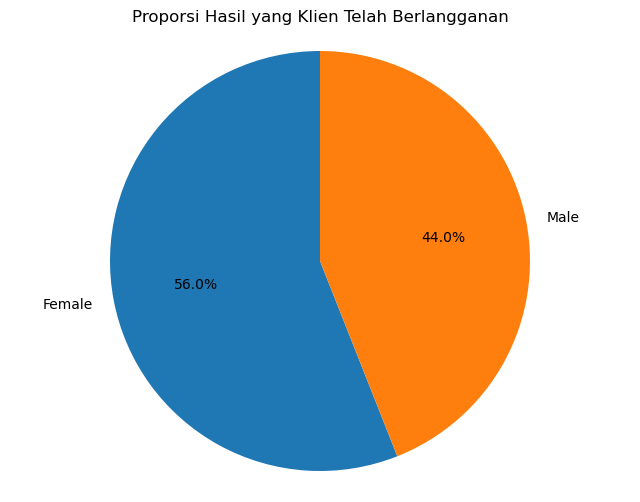

In [39]:
# make an insightful visualization and explain
species_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Hasil yang Klien Telah Berlangganan')
plt.axis('equal')
plt.show()


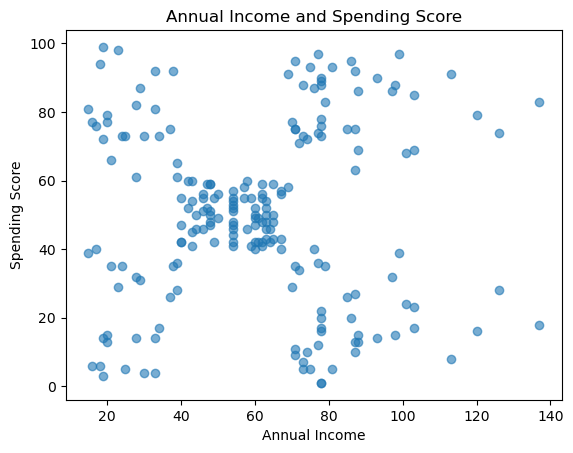

In [40]:
# Visualize the position using the original scale
import matplotlib.pyplot as plt

plt.scatter(df["AnnualIncome"], df["SpendingScore"], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income and Spending Score")
plt.show()

## Data Preprocessing

For this case study, we only use income and spending score

In [41]:
# create new dataframe that consist only annual income and spending score
df = df.iloc[:, -2:]
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [42]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=["Income", "Spending"])
df.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [43]:
# get stastical information on the new dataset
df[['Income', 'Spending']].describe()

,Income,Spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

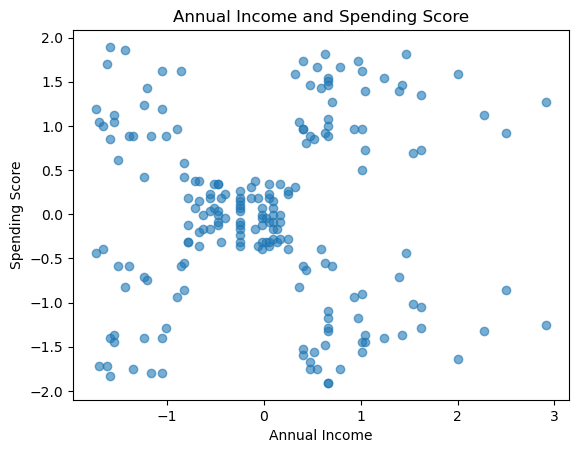

In [44]:
# Visualize the position
import matplotlib.pyplot as plt

plt.scatter(df["Income"], df["Spending"], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income and Spending Score")
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [45]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

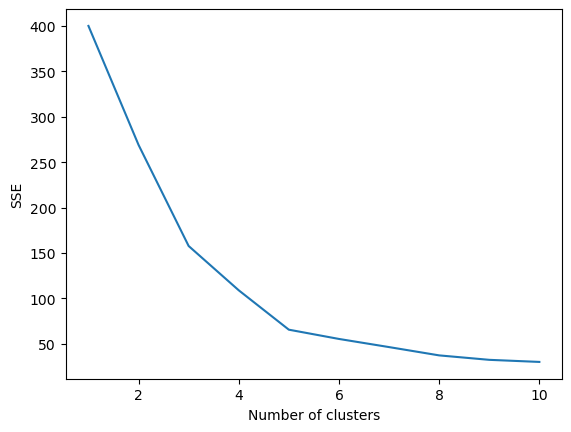

In [46]:
# manually visualize the elbow method using plotlib
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [47]:
# using kneelocator to find the elbow/knee
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [48]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=100, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Visualize your result based on income and spending. You also can show the final position of the centroid.

C:\Users\HP\AppData\Local\Temp\ipykernel_14180\3150734883.py:5: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Income", y = "Spending", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)


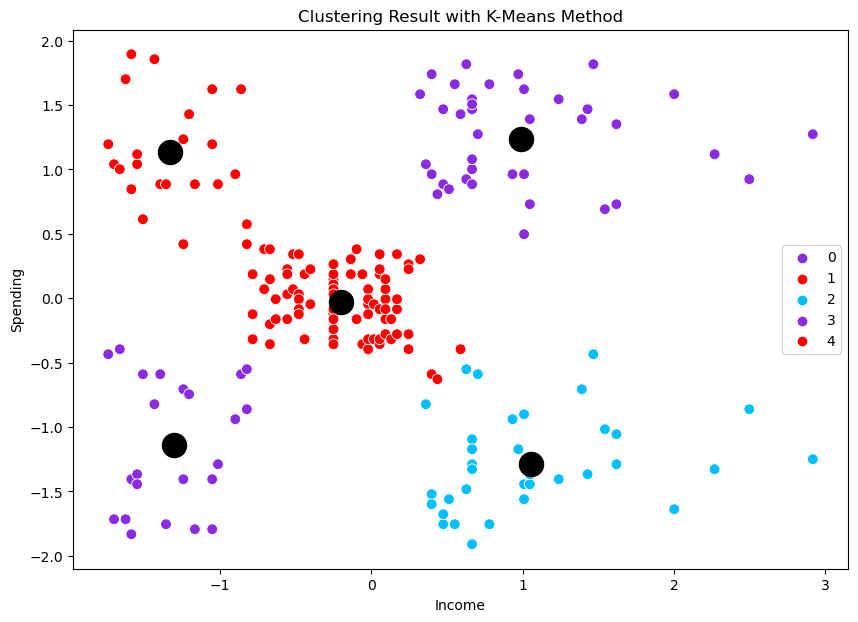

In [50]:
# visualize the result using scater chart
import seaborn as sns
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Spending", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Income")
plt.ylabel("Spending")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [51]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(sc.inverse_transform(df), columns=['AnnualIncome','SpendingScore'])
df['Cluster'] = y_pred
df.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [52]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'SpendingScore': ['mean', 'std', 'min','max'],
                                          'AnnualIncome' : ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')
cluster_summary

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

Kesimpulan

Cluster 0: Pelanggan dalam kelompok ini memiliki Spending Score yang rendah (rata-rata 20,91) dan Annual Income yang juga relatif rendah (rata-rata 26,30). Pelanggan ini cenderung tidak mengeluarkan banyak uang untuk berbelanja.

Saran: Perusahaan dapat mencoba meningkatkan pengeluaran pelanggan di cluster ini melalui promosi diskon atau program loyalitas untuk mendorong mereka berbelanja lebih banyak. Selain itu, perusahaan juga dapat menargetkan produk-produk yang lebih terjangkau bagi kelompok ini.
Cluster 1: Pelanggan ini memiliki Spending Score yang tinggi (rata-rata 79,36) tetapi pendapatan tahunan yang rendah (rata-rata 25,72). Ini menunjukkan bahwa kelompok ini memiliki kecenderungan untuk berbelanja meskipun pendapatan mereka terbatas.

Saran: Perusahaan dapat mempertahankan pelanggan di cluster ini dengan menyediakan opsi pembelian cicilan atau diskon untuk pembelian dalam jumlah besar, agar mereka tetap termotivasi untuk berbelanja meski dengan pendapatan yang lebih rendah.
Cluster 2: Pelanggan di cluster ini memiliki Spending Score yang rendah (rata-rata 17,11) tetapi memiliki Annual Income yang tinggi (rata-rata 88,20). Artinya, mereka memiliki pendapatan yang tinggi tetapi cenderung tidak banyak berbelanja.

Saran: Perusahaan dapat mencoba strategi untuk menarik minat belanja kelompok ini, misalnya dengan mengadakan promosi eksklusif atau menyediakan produk premium yang sesuai dengan daya beli mereka. Penawaran yang lebih personal juga mungkin menarik perhatian mereka.
Cluster 3: Pelanggan di cluster ini memiliki Spending Score yang tinggi (rata-rata 82,13) dan pendapatan yang tinggi (rata-rata 86,53). Kelompok ini adalah segmen pelanggan yang sangat berharga karena mereka memiliki daya beli tinggi dan kecenderungan belanja yang tinggi.

Saran: Perusahaan harus mempertahankan pelanggan ini dengan memberikan penawaran eksklusif, meningkatkan layanan pelanggan, dan memberikan akses lebih awal untuk produk atau acara khusus. Fokus pada pengalaman berbelanja yang premium juga dapat membantu mempertahankan kelompok ini.
Cluster 4: Kelompok ini memiliki Spending Score dan Annual Income di tingkat menengah (rata-rata Spending Score: 49,52; Annual Income: 55,30). Kelompok ini bisa disebut sebagai pelanggan dengan belanja dan pendapatan yang seimbang.

Saran: Perusahaan dapat menargetkan cluster ini dengan promosi yang fleksibel, misalnya diskon musiman atau penawaran bundel. Selain itu, meningkatkan variasi produk dalam

<write here>